In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_path = 'data/ElectricPowerProduction/X.txt'
y_path = 'data/ElectricPowerProduction/Y.txt'

In [3]:
x = pd.read_csv(x_path,sep=';')
y = pd.read_csv(y_path,sep=';')

In [4]:
x.head()

,Year,IsDayBin,Month,WindSpeed,IrrDirect,IrrDiffuse,Temperature,Percipitation,SnowFlow,SnowMass,AirDensity,RadSurface,RadTop,CloudCover
R1,2016,Night,1,5.777,0.0,0.0,-1.210,0.114,0.099,10.592,1.268,0.0,0.0,1.0
R2,2016,Night,1,5.887,0.0,0.0,-0.862,0.114,0.103,10.671,1.266,0.0,0.0,1.0
R3,2016,Night,1,5.957,0.0,0.0,-0.552,0.122,0.111,10.756,1.265,0.0,0.0,1.0
R4,2016,Night,1,6.025,0.0,0.0,-0.297,0.158,0.145,10.855,1.264,0.0,0.0,1.0
R5,2016,Night,1,6.101,0.0,0.0,-0.149,0.164,0.081,10.884,1.263,0.0,0.0,1.0


In [5]:
y.head()

,WindPower,PVPower
R1,396.352,0.0
R2,417.778,0.0
R3,434.581,0.0
R4,448.482,0.0
R5,465.790,0.0


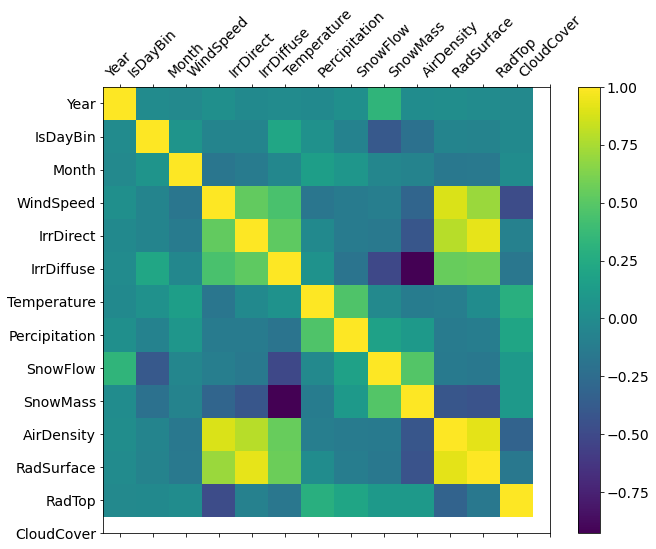

In [6]:
f = plt.figure(figsize=(10,8))
plt.matshow(x.corr(), fignum=f.number)
plt.xticks(range(x.shape[1]), x.columns, fontsize=14, rotation=45)
plt.yticks(range(x.shape[1]), x.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [7]:
x['IsDayBin'].unique()

array(['Night', 'Day'], dtype=object)

In [8]:
X=x.drop(['Year','IsDayBin','Month'],axis=1)

In [9]:
X=X.values
Y=y.values

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

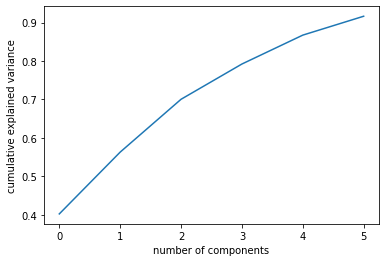

In [11]:
from sklearn.decomposition import PCA
pca = PCA(6).fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [12]:
P=pca.components_
T = X_scaled.dot(P.T)

First component  [-0.07338616  0.38030048  0.39169996  0.37810002 -0.04815644 -0.11656518
 -0.17705383 -0.32159164  0.43704876  0.42920331 -0.16641727]


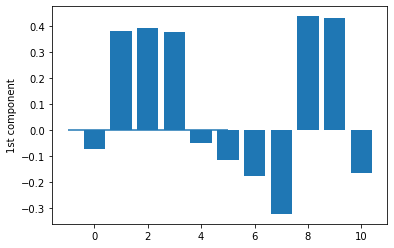

In [13]:
#WindSpeed	IrrDirect	IrrDiffuse	Temperature	Percipitation	SnowFlow	SnowMass	AirDensity	RadSurface	RadTop	CloudCover
print("First component ", P.T[:,0])
x = np.arange(X_scaled.shape[1])
plt.bar(x, height= P.T[:,0])
plt.hlines(0,-1,5)
plt.ylabel("1st component")
plt.show()

# Task 0: Explore the dataset using what you have learned so far